In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
drug_data = "data/mouse_drug_data.csv"
#drug_data = "C:/Users/edeli/Desktop/05-Matplotlib/Homework/Pymaceuticals/data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
drug_df = pd.read_csv(drug_data)
clinical_df = pd.read_csv(clinical_data)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_df, drug_df, on="Mouse ID",how="left")
combined_df
# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#group data by drug and timepoint 
#group_data = combined_df.groupby(["Drug", "Timepoint"])

#find avg tumor volume and metastic sites for each drug at each timepoint
#tumor_mean = group_data.mean()
#tumor_mean.head(11)

# Store the Mean Tumor Volume Data Grouped by drug and Timepoint
grouped_drug = combined_df.groupby(["Drug","Timepoint"]) ["Tumor Volume (mm3)"]
#group_data = combined_df.groupby(["Drug", "Timepoint"])
#group_data = combined _df.groupby["Timepoint"]
tumor_df = grouped_drug.mean()

# Convert to DataFrame

tumor_df = tumor_df.reset_index()

# Preview DataFrame
tumor_df.head(12)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#error_df = grouped_drug.unstacked(level=0)
#error_df = grouped_drug.columns.get_level_velues(1)
error_df = grouped_drug.sem()


# Convert to DataFrame
tumor_error_df = pd.DataFrame(error_df)

# Preview DataFrame
tumor_error_df.reset_index(inplace=True)
tumor_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_df = tumor_df.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked
reformat_df.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
combined_df = pd.merge(clinical_df, drug_df, on="Mouse ID",how="left")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
...,...,...,...,...,...
1901,r944,45,41.581521,2,Capomulin
1902,u364,45,31.023923,3,Capomulin
1903,p438,45,61.433892,1,Ceftamin
1904,x773,45,58.634971,4,Placebo


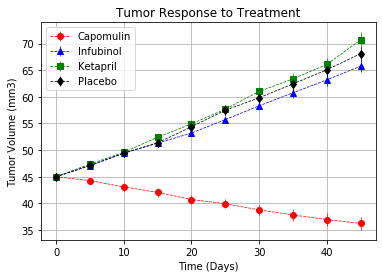

In [6]:
# Generate the Plot (with Error Bars)

#plot_name = plt.plot(reformat_df, color="red", marker="o", label="Capomulin" )
#plot_name = plt.plot(reformat_df, color="blue", marker="^", label="Infubinol" )
#plot_name = plt.plot(reformat_df, color="green", marker="s", label="Ketapril" )
#plot_name = plt.plot(reformat_df, color="black", marker="d", label="Placebo" )
#plot_name = (["Capomulin", "Infubinol", "Ketapril", "Placebo"])
#marker = ["o", "^", "s", "d"]
#colors = ["red", "blue", "green", "black"]

plot_name = [("Capomulin","o","red"),
             ("Infubinol","^","blue"),
             ("Ketapril","s","green"),
             ("Placebo","d","black")]


for drug, marker, colors in plot_name:
    t_error = error_df[drug]
    t_plot = plt.errorbar(reformat_df.index, reformat_df[drug], t_error,
                         linewidth=0.75,marker=marker,ls='--',color=colors)

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# STORE THE MEAN MET. SITE DATA GROUPED BY DRUG AND TIMEPOINT 

#Group Data by Drug  
#metastatic_group = combined_df.groupby(["Drug", "Timepoint"])

#find avg tumor volume and metastic sites for each drug at each timepoint
#metastatic_avg = group_data.mean()

#metastatic_avg.head(5)
#______________________________________________________________________________
#Group Data by Drug  
#combined_df.groupby ('Drug')['Timepoint'].count()
#metastatic_group = combined_df.groupby(['Drug', 'Timepoint'])
#metastatic_avg = metastatic_group['Metastatic Sites'].mean()
#metastatic_avg.head(5)
#____________________________________________________________________
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Grouped Data
metastatic_group = combined_df.groupby(["Drug","Timepoint"]) ["Metastatic Sites"]

#Find The mean
metastatic_avg = metastatic_group.mean()

# Convert to DataFrame

metastatic_avg = metastatic_avg.reset_index()

# Preview DataFrame
metastatic_avg.head(5)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_error = metastatic_group.sem()

# Convert to DataFrame
met_error_df = pd.DataFrame(met_error)

# Preview DataFrame
met_error_df.reset_index(inplace=True)

met_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
met_reformat_df = metastatic_avg.pivot(index="Timepoint", columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked
met_reformat_df.head(5)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


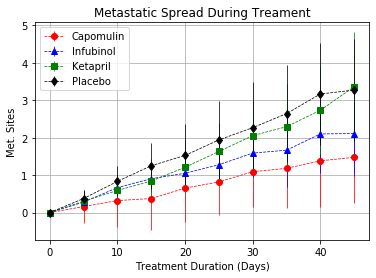

In [17]:
# Generate the Plot (with Error Bars)
# Save the Figure


# Show the Figure
#table= tumor_df[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
#markers = ["o", "^", "s", "d"]
#colors = ["red", "blue", "green", "black"]
plot_name = [("Capomulin","o","red"),
             ("Infubinol","^","blue"),
             ("Ketapril","s","green"),
             ("Placebo","d","black")]

for drug, marker, colors in plot_name:
    
    t_error = error_df[drug]
    
    mett_plot = plt.errorbar(met_reformat_df.index, met_reformat_df[drug], t_error,
                      linewidth=0.75,marker=marker,ls='--',color=colors)

plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Metastatic Spread During Treament")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.show()





![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"]
mice_number = mice_group.nunique()
mice_number = pd.DataFrame(mice_number)

# Convert to DataFrame
mice_number.reset_index(inplace=True)
mice_number = mice_number.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_number.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mice_number_format = mice_number.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
mice_number_format.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


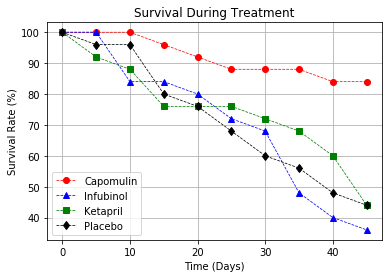

In [13]:
# Generate the Plot (Accounting for percentages)

#markers = ["o", "^", "s", "d"]
#colors = ["red", "blue", "green", "black"]
plot_name = [("Capomulin","o","red"),
             ("Infubinol","^","blue"),
             ("Ketapril","s","green"),
             ("Placebo","d","black")]
for drug, marker, colors in plot_name:
    mouse = mice_number_format[drug][0]
    rate =(mice_number_format[drug]/mouse)*100
    mouse_plot = plt.errorbar(mice_number_format.index, rate,
                         linewidth=0.75,marker=marker,ls='--',color=colors)

#plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.grid()
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
#percent_changes = (reformat_df /)
#percent_changes = (reformat_df.loc[45, :] - reformat_df.loc[0, :])/ reformat_df.loc[0, :]*100
percent_changes = (reformat_df.iloc[-1]/(reformat_df.iloc[0])-1) * 100


# Display the data to confirm
percent_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

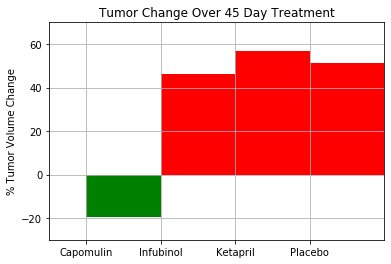

In [15]:

drugs = (["Capomulin", "Infubinol", "Ketapril", "Placebo"])
#datas = [-19, 46, 57, 51]
x_axis = np.arange(0, len(drugs))

tick_locations = [value for value in x_axis]

condition = percent_changes < 0

list_df = [(percent_changes[durg])for durg in drugs]
#data['drugs'].plot(kind='bar',
                   # color=(data['drugs'] > 0).map({True: 'g',
                                                    #False: 'g'}))
#plt.bar(x_axis, datas, facecolor="red", width=0.5, align="center", )

change_plt = plt.bar(drugs, list_df,align="edge",width=1,color=condition.map({True:"g",False:"r"}))

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
#plt.hlines(0, 1, x_lim, alpha=0.2)
plt.xlim(-0.50, len(drugs))
plt.ylim(-30, 70)

plt.xticks(tick_locations, drugs)
plt.grid()
plt.show()






![Metastatic Spread During Treatment](../Images/change.png)